In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from scipy import stats

target_variable = '_MICHD'

## Data Transformation

In [2]:
fillna_cdc = pd.read_pickle('./dataset_filled_na.pkl')

In [3]:
casted_cdc = fillna_cdc.astype(np.float32)
casted_cdc.describe()

,_MICHD,GENHLTH,_BMI5,_AGEG5YR,EMPLOY1,_STATE,SLEPTIM1,TETANUS,INCOME2,_EDUCAG,...,CHCKIDNY,CHCSCNCR,CHECKUP1,_PNEUMO2,WRITTEN,UNDRSTND,MEDADVIC,_PRACE1,DECIDE,DRNK3GE5
count,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,...,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000,417762.000000
mean,1.903639,2.590449,2639.447510,7.939549,3.996838,29.168953,7.825973,3.262343,18.235296,2.955518,...,1.976221,1.913475,1.530209,0.638768,0.357081,0.313066,0.326830,3.098441,1.925379,34.277534
std,0.295086,1.113423,902.930176,3.441724,2.880877,16.008047,7.593786,1.636949,29.922846,1.017982,...,0.337706,0.390049,1.197181,1.404142,0.869926,0.711291,0.823295,12.588753,0.494496,42.394764
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,2317.000000,6.000000,1.000000,16.000000,6.000000,2.000000,5.000000,2.000000,...,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000
50%,2.000000,3.000000,2663.000000,8.000000,3.000000,28.000000,7.000000,3.000000,7.000000,3.000000,...,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
75%,2.000000,3.000000,3083.000000,11.000000,7.000000,40.000000,8.000000,4.000000,8.000000,4.000000,...,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,88.000000
max,2.000000,9.000000,9960.000000,14.000000,9.000000,78.000000,99.000000,9.000000,99.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,9.000000,99.000000


Now we can scale all the variables in the interval [0,1]

In [4]:
casted_cdc.head()

,_MICHD,GENHLTH,_BMI5,_AGEG5YR,EMPLOY1,_STATE,SLEPTIM1,TETANUS,INCOME2,_EDUCAG,...,CHCKIDNY,CHCSCNCR,CHECKUP1,_PNEUMO2,WRITTEN,UNDRSTND,MEDADVIC,_PRACE1,DECIDE,DRNK3GE5
0,2.0,1.0,2053.0,5.0,1.0,1.0,5.0,3.0,5.0,2.0,...,2.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0
1,2.0,2.0,2710.0,8.0,5.0,1.0,6.0,4.0,7.0,2.0,...,2.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0
2,1.0,3.0,1997.0,13.0,7.0,1.0,9.0,4.0,7.0,3.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,88.0
3,2.0,3.0,2903.0,11.0,7.0,1.0,7.0,4.0,7.0,4.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0
4,2.0,5.0,2018.0,1.0,1.0,1.0,6.0,4.0,77.0,2.0,...,2.0,2.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,0.0


In [5]:
X = casted_cdc.drop(target_variable, axis=1)
y = casted_cdc[target_variable]

Moved the target variable as last variable

In [6]:
concat_cdc = pd.concat([X, y], axis=1)
concat_cdc.head()

,GENHLTH,_BMI5,_AGEG5YR,EMPLOY1,_STATE,SLEPTIM1,TETANUS,INCOME2,_EDUCAG,_PHYS14D,...,CHCSCNCR,CHECKUP1,_PNEUMO2,WRITTEN,UNDRSTND,MEDADVIC,_PRACE1,DECIDE,DRNK3GE5,_MICHD
0,1.0,2053.0,5.0,1.0,1.0,5.0,3.0,5.0,2.0,1.0,...,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0
1,2.0,2710.0,8.0,5.0,1.0,6.0,4.0,7.0,2.0,1.0,...,2.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,0.0,2.0
2,3.0,1997.0,13.0,7.0,1.0,9.0,4.0,7.0,3.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,88.0,1.0
3,3.0,2903.0,11.0,7.0,1.0,7.0,4.0,7.0,4.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,2.0
4,5.0,2018.0,1.0,1.0,1.0,6.0,4.0,77.0,2.0,2.0,...,2.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,0.0,2.0


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import math

np.random.seed(1234)

In [8]:
shuffled_cdc = shuffle(concat_cdc)

In [9]:
scaler = MinMaxScaler()

In [10]:
scaler.fit(shuffled_cdc)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
transformed_cdc_np = scaler.transform(shuffled_cdc)
transformed_cdc_np.shape

(417762, 56)

In [17]:
transformed_cdc = pd.DataFrame(transformed_cdc_np, columns=shuffled_cdc.columns)
transformed_cdc.head()

,GENHLTH,_BMI5,_AGEG5YR,EMPLOY1,_STATE,SLEPTIM1,TETANUS,INCOME2,_EDUCAG,_PHYS14D,...,CHCSCNCR,CHECKUP1,_PNEUMO2,WRITTEN,UNDRSTND,MEDADVIC,_PRACE1,DECIDE,DRNK3GE5,_MICHD
0,0.222222,0.351104,0.615385,0.000,0.623377,0.081633,0.00,0.061224,0.250,0.000,...,0.000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,1.0
1,0.333333,0.396386,0.384615,0.000,0.428571,0.061224,0.25,1.000000,0.250,0.000,...,0.125,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,1.0
2,0.222222,0.307932,0.076923,0.625,0.337662,0.061224,0.00,0.061224,0.125,0.125,...,0.125,0.111111,0.000000,0.111111,0.111111,0.111111,0.000000,0.125,0.010101,1.0
3,0.222222,0.225703,0.692308,0.875,0.142857,0.010204,0.00,0.775510,0.000,0.000,...,0.125,0.111111,0.222222,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,1.0
4,0.111111,0.000000,0.615385,0.750,0.467532,0.071429,0.00,1.000000,0.375,0.000,...,0.125,0.111111,0.000000,0.111111,0.111111,0.111111,0.010204,0.125,0.000000,1.0


## Handling Inbalanced Data

### Classical Approach

Since the dataset is inbalanced we need to apply an oversampling technique to generate new samples for the less frequent class.
[SMOTE: Synthetic Minority Over-sampling Technique](https://www.jair.org/media/953/live-953-2037-jair.pdf) is one of the most famous contribution to solve this problem. To then oversample, take a sample from the dataset, and consider its k nearest neighbors (in feature space). To create a synthetic data point, take the vector between one of those k neighbors, and the current data point. Multiply this vector by a random number x which lies between 0, and 1. Add this to the current data point to create the new, synthetic data point.

### Generative Adversarial Network

Generative Adversarial Networks (GANs) were [first reported](https://arxiv.org/abs/1406.2661 on in 2014 from Ian Goodfellow and others in Yoshua Bengio's lab. Since then, GANs have exploded in popularity. Here are a few examples to check out:

- [Pix2Pix](https://affinelayer.com/pixsrv/)
- [CycleGAN](https://github.com/junyanz/CycleGAN)

The idea behind GANs is that you have two networks, a generator $G$ and a discriminator $D$, competing against each other. The generator makes fake data to pass to the discriminator. The discriminator also sees real data and predicts if the data it's received is real or fake. The generator is trained to fool the discriminator, it wants to output data that looks as close as possible to real data. And the discriminator is trained to figure out which data is real and which is fake. What ends up happening is that the generator learns to make data that is indistiguishable from real data to the discriminator.

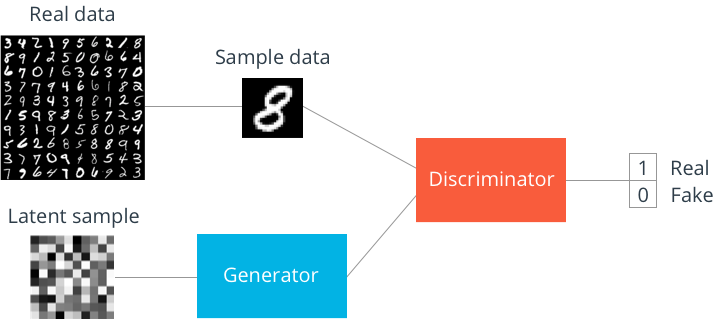

We need to create an oversampler for '_MICHD' = 0.0 

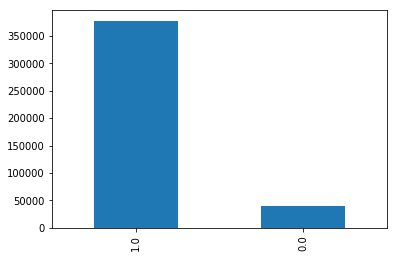

In [19]:
transformed_cdc[target_variable].value_counts().plot.bar()
plt.show()

In [409]:
from keras import layers, optimizers, models, activations, losses
from tqdm import tqdm

np.random.seed(1234)

In [123]:
gen_in_dim = 10
gen_out_dim = X_new.shape[1]
discr_inp_dim = X_new.shape[1]

### Define the Generator

In [146]:
def build_generator(G_in, dense_dim=200, out_dim=50, lr=1e-3):
    x_1 = layers.Dense(128)(G_in)
    x_1 = layers.normalization.BatchNormalization()(x_1)
    x_1 = layers.Activation('relu')(x_1)
    
    x_2 = layers.Dense(256)(x_1)
    x_2 = layers.normalization.BatchNormalization()(x_2)
    x_2 = layers.Activation('relu')(x_2)
    
    x_3 = layers.Dense(128)(x_2)
    x_3 = layers.normalization.BatchNormalization()(x_3)
    x_3 = layers.Activation('relu')(x_3)
    
    G_out = layers.Dense(out_dim, activation='relu')(x_3)
    G = models.Model(G_in, G_out)
    opt = optimizers.Adam()
    G.compile(loss='binary_crossentropy', optimizer=opt)
    return G, G_out

In [147]:
G_in = layers.Input(shape=[gen_in_dim])
G, G_out = build_generator(G_in, out_dim=gen_out_dim)
G.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 10)                0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               1408      
_________________________________________________________________
batch_normalization_17 (Batc (None, 128)               512       
_________________________________________________________________
activation_22 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_18 (Batc (None, 256)               1024      
_________________________________________________________________
activation_23 (Activation)   (None, 256)               0         
__________

### Define the Discriminator

In [148]:
def build_discriminator(D_in, lr=1e-3, drate=.25, n_channels=50, conv_sz=5, leak=.2):
    x = layers.Reshape((-1, 1))(D_in)
    x = layers.Conv1D(n_channels, conv_sz, activation='relu')(x)
    x = layers.Dropout(drate)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(n_channels)(x)
    D_out = layers.Dense(2, activation='sigmoid')(x)
    D = models.Model(D_in, D_out)
    dopt = optimizers.Adam()
    D.compile(loss='binary_crossentropy', optimizer=dopt)
    return D, D_out

In [149]:
D_in = layers.Input(shape=[discr_inp_dim])
D, D_out = build_discriminator(D_in)
D.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 55)                0         
_________________________________________________________________
reshape_7 (Reshape)          (None, 55, 1)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 51, 50)            300       
_________________________________________________________________
dropout_7 (Dropout)          (None, 51, 50)            0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2550)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 50)                127550    
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 102       
Total para

### Chained model: GAN

Finally, we chain the two models into a GAN that will serve to train the generator while we freeze the discriminator.

In [150]:
def set_trainability(model, trainable=False):
    model.trainable = trainable
    for layer in model.layers:
        layer.trainable = trainable

In [151]:
def make_gan(GAN_in, G, D):
    set_trainability(D, False)
    x = G(GAN_in)
    GAN_out = D(x)
    GAN = models.Model(GAN_in, GAN_out)
    GAN.compile(loss='binary_crossentropy', optimizer=G.optimizer)
    return GAN, GAN_out

In [152]:
GAN_in = layers.Input([gen_in_dim])
GAN, GAN_out = make_gan(GAN_in, G, D)
GAN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 10)                0         
_________________________________________________________________
model_20 (Model)             (None, 55)                76471     
_________________________________________________________________
model_21 (Model)             (None, 2)                 127952    
Total params: 204,423
Trainable params: 75,447
Non-trainable params: 128,976
_________________________________________________________________


### Training

Now we did setup our models, we can train the models by alterning training the discriminator and the chained models.

#### Pre-training

Let’s now generate some fake and real data and pre-train the discriminator before starting the gan. This also let us check if our compiled models correclty runs on our real and noisy input.

In [153]:
def sample_data(n_samples, n_dims):
    return np.random.uniform(size=(n_samples,n_dims))

In [154]:
def sample_data_and_gen(G, noise_dim, discr_dim, n_samples=10000):
    XT = sample_data(n_samples=n_samples, n_dims=discr_dim)
    XN_noise = np.random.uniform(0, 1, size=[n_samples, noise_dim])
    XN = G.predict(XN_noise)
    X = np.concatenate((XT, XN))
    y = np.zeros((2*n_samples, 2))
    y[:n_samples, 1] = 1
    y[n_samples:, 0] = 1
    return X, y

In [155]:
X, y = sample_data_and_gen(G, noise_dim=gen_in_dim, discr_dim=discr_inp_dim, n_samples=10000)

In [156]:
X.shape

(20000, 55)

In [157]:
def pretrain(G, D, noise_dim, discr_dim, n_samples=10000, batch_size=32):
    X, y = sample_data_and_gen(G, n_samples=n_samples, noise_dim=noise_dim, discr_dim=discr_dim)
    set_trainability(D, True)
    D.fit(X, y, epochs=1, batch_size=batch_size)

In [158]:
pretrain(G, D, noise_dim=gen_in_dim, discr_dim=discr_inp_dim)

Epoch 1/1
20000/20000 [==============================] - 3s - loss: 0.0139     


### Alternating training steps
We can now train our GAN by alternating the training of the Discriminator and the training of the chained GAN model with Discriminator’s weights freezed.

At first we need to filter the dataset to sample the real examples 

In [137]:
transformed_cdc.head()

,GENHLTH,_BMI5,_AGEG5YR,EMPLOY1,_STATE,SLEPTIM1,TETANUS,INCOME2,_EDUCAG,_PHYS14D,...,CHCSCNCR,CHECKUP1,_PNEUMO2,WRITTEN,UNDRSTND,MEDADVIC,_PRACE1,DECIDE,DRNK3GE5,_MICHD
0,0.222222,0.351104,0.615385,0.000,0.623377,0.081633,0.00,0.061224,0.250,0.000,...,0.000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,1.0
1,0.333333,0.396386,0.384615,0.000,0.428571,0.061224,0.25,1.000000,0.250,0.000,...,0.125,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,1.0
2,0.222222,0.307932,0.076923,0.625,0.337662,0.061224,0.00,0.061224,0.125,0.125,...,0.125,0.111111,0.000000,0.111111,0.111111,0.111111,0.000000,0.125,0.010101,1.0
3,0.222222,0.225703,0.692308,0.875,0.142857,0.010204,0.00,0.775510,0.000,0.000,...,0.125,0.111111,0.222222,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,1.0
4,0.111111,0.000000,0.615385,0.750,0.467532,0.071429,0.00,1.000000,0.375,0.000,...,0.125,0.111111,0.000000,0.111111,0.111111,0.111111,0.010204,0.125,0.000000,1.0


In [138]:
heart_attack_df = transformed_cdc[transformed_cdc[target_variable] == 0.0]
heart_attack_df.head()

,GENHLTH,_BMI5,_AGEG5YR,EMPLOY1,_STATE,SLEPTIM1,TETANUS,INCOME2,_EDUCAG,_PHYS14D,...,CHCSCNCR,CHECKUP1,_PNEUMO2,WRITTEN,UNDRSTND,MEDADVIC,_PRACE1,DECIDE,DRNK3GE5,_MICHD
9,0.333333,0.334137,0.384615,0.375,0.000000,0.051020,0.125,0.000000,0.125,0.250,...,0.125,0.222222,0.000000,0.222222,0.222222,0.111111,0.010204,0.000,0.010101,0.0
44,0.333333,0.252008,0.923077,0.750,0.636364,0.051020,0.375,0.051020,0.375,0.125,...,0.125,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,0.0
46,0.333333,0.327711,0.615385,0.000,0.090909,0.071429,0.375,1.000000,0.375,0.000,...,0.125,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.020202,0.0
47,0.222222,0.275502,0.769231,0.750,0.714286,0.071429,0.750,0.040816,0.125,0.000,...,0.125,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.125,0.888889,0.0
56,0.333333,0.297691,0.769231,0.750,0.103896,0.061224,0.750,0.071429,0.250,0.000,...,0.000,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.125,0.777778,0.0


In [139]:
heart_attack_drop_target_df = heart_attack_df.drop([target_variable], axis=1)
heart_attack_drop_target_df.head()

,GENHLTH,_BMI5,_AGEG5YR,EMPLOY1,_STATE,SLEPTIM1,TETANUS,INCOME2,_EDUCAG,_PHYS14D,...,CHCKIDNY,CHCSCNCR,CHECKUP1,_PNEUMO2,WRITTEN,UNDRSTND,MEDADVIC,_PRACE1,DECIDE,DRNK3GE5
9,0.333333,0.334137,0.384615,0.375,0.000000,0.051020,0.125,0.000000,0.125,0.250,...,0.125,0.125,0.222222,0.000000,0.222222,0.222222,0.111111,0.010204,0.000,0.010101
44,0.333333,0.252008,0.923077,0.750,0.636364,0.051020,0.375,0.051020,0.375,0.125,...,0.125,0.125,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.125,0.000000
46,0.333333,0.327711,0.615385,0.000,0.090909,0.071429,0.375,1.000000,0.375,0.000,...,0.125,0.125,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.020202
47,0.222222,0.275502,0.769231,0.750,0.714286,0.071429,0.750,0.040816,0.125,0.000,...,0.125,0.125,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.125,0.888889
56,0.333333,0.297691,0.769231,0.750,0.103896,0.061224,0.750,0.071429,0.250,0.000,...,0.125,0.000,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.125,0.777778


In [159]:
def sample_real_data(n_samples):
    return heart_attack_drop_target_df.sample(n_samples).values    

In [160]:
def sample_read_data_and_gen(G, noise_dim, n_samples=10000):
    XT = sample_real_data(n_samples=n_samples)
    XN_noise = np.random.uniform(0, 1, size=[n_samples, noise_dim])
    XN = G.predict(XN_noise)
    X = np.concatenate((XT, XN))
    y = np.zeros((2*n_samples, 2))
    y[:n_samples, 1] = 1
    y[n_samples:, 0] = 1
    return X, y

In [161]:
def sample_noise(G, noise_dim, n_samples=10000):
    X = np.random.uniform(0, 1, size=[n_samples, noise_dim])
    y = np.zeros((n_samples, 2))
    y[:, 1] = 1
    return X, y

In [162]:
def train(GAN, G, D, noise_dim, epochs=500, n_samples=10000, batch_size=32, verbose=False, v_freq=50):
    d_loss = []
    g_loss = []
    e_range = range(epochs)
#     if verbose:
#         e_range = tqdm(e_range)
    for epoch in e_range:
        X, y = sample_read_data_and_gen(G, n_samples=n_samples, noise_dim=noise_dim)
        set_trainability(D, True)
        d_loss.append(D.train_on_batch(X, y))
        
        X, y = sample_noise(G, n_samples=n_samples, noise_dim=noise_dim)
        set_trainability(D, False)
        g_loss.append(GAN.train_on_batch(X, y))
        if verbose and (epoch + 1) % v_freq == 0:
            print("Epoch #{}: Generative Loss: {}, Discriminative Loss: {}".format(epoch + 1, g_loss[-1], d_loss[-1]))
    return d_loss, g_loss

In [164]:
d_loss, g_loss = train(GAN, G, D, noise_dim=gen_in_dim, epochs=200, verbose=True, v_freq=5)

Epoch #5: Generative Loss: 1.1000356181511961e-07, Discriminative Loss: 0.005386353936046362
Epoch #10: Generative Loss: 1.2728001763662178e-07, Discriminative Loss: 0.0015258047496899962
Epoch #15: Generative Loss: 2.2039264990780794e-07, Discriminative Loss: 0.0016171348979696631
Epoch #20: Generative Loss: 2.036942703398381e-07, Discriminative Loss: 0.0024478051345795393
Epoch #25: Generative Loss: 2.2525449594468228e-07, Discriminative Loss: 0.005005803424865007
Epoch #30: Generative Loss: 1.9015894281437795e-07, Discriminative Loss: 0.015111343003809452
Epoch #35: Generative Loss: 7.475093752873363e-07, Discriminative Loss: 0.02756485342979431
Epoch #40: Generative Loss: 2.5761783035704866e-05, Discriminative Loss: 0.02867698296904564
Epoch #45: Generative Loss: 3.805177766480483e-05, Discriminative Loss: 0.044054288417100906
Epoch #50: Generative Loss: 1.6505484381923452e-05, Discriminative Loss: 0.052913598716259
Epoch #55: Generative Loss: 3.833551818388514e-05, Discriminative 

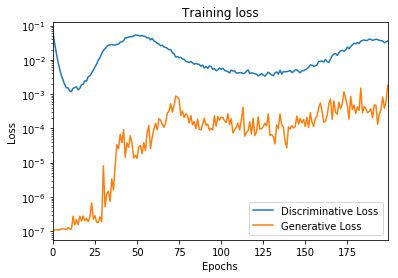

In [165]:
%matplotlib inline
ax = pd.DataFrame(
    {
        'Generative Loss': g_loss,
        'Discriminative Loss': d_loss,
    }
).plot(title='Training loss', logy=True)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")

Now we can use the generator to create new examples. We want to generate at least 100k examples to make the dataset balanced.

In [166]:
transformed_cdc[target_variable].value_counts()

1.0    377506
0.0     40256
Name: _MICHD, dtype: int64

In [352]:
def oversample_dataset(G, df, n_samples):
    # generate n_samples
    XN_noise = np.random.uniform(0, 1, size=[n_samples, gen_in_dim])
    XN = G.predict(XN_noise)
    # append the target variable
    t = np.zeros((XN.shape[0],1))
    # Append the new generated data to the existing dataframe
    XN_appended = np.append(XN,t, axis=1)
    XN_df = pd.DataFrame(XN_appended, columns=df.columns)
    oversampled_df = XN_df.append(df)
    return oversampled_df

In [356]:
oversampled_df = oversample_dataset(G, transformed_cdc, 10000)

In [357]:
transformed_cdc.shape

(417762, 56)

In [358]:
oversampled_df.shape

(427762, 56)

In [359]:
oversampled_df.head()

,GENHLTH,_BMI5,_AGEG5YR,EMPLOY1,_STATE,SLEPTIM1,TETANUS,INCOME2,_EDUCAG,_PHYS14D,...,CHCSCNCR,CHECKUP1,_PNEUMO2,WRITTEN,UNDRSTND,MEDADVIC,_PRACE1,DECIDE,DRNK3GE5,_MICHD
0,0.433103,1.093352,1.794026,2.369062,0.324431,0.663572,1.893259,0.362785,0.193429,0.890923,...,0.000000,0.695081,0.000000,0.000000,0.057562,0.363684,0.047338,0.433980,0.302726,0.0
1,0.872485,0.735751,1.334107,2.130160,0.714181,0.431106,2.646604,0.673815,1.202521,0.686619,...,0.000000,0.000000,0.367252,0.250517,0.168362,0.000000,0.460147,0.565857,0.597484,0.0
2,1.362725,1.229241,1.995849,2.349636,0.000000,0.000000,2.602469,0.402746,0.317203,0.859202,...,0.290488,0.545059,0.000000,0.003440,0.000000,0.000000,0.406304,0.211033,0.883122,0.0
3,1.780233,1.085056,1.865651,2.023071,0.537042,0.877120,2.725894,0.577512,1.126270,0.745223,...,0.000000,0.802873,0.000000,0.630896,0.058228,0.000000,0.069499,0.924295,0.504403,0.0
4,1.273726,1.398840,1.651817,2.145727,0.951965,1.053476,2.220606,0.545901,0.947317,0.787847,...,0.000000,0.877546,0.000000,0.275925,0.140096,0.000000,0.203576,0.689730,0.376593,0.0


In [193]:
oversampled_df.to_pickle('./dataset_oversampled.pkl')

## Build the Classifier

In [273]:
from keras import metrics

In [396]:
def create_train_test(data):
    shuffled_data = shuffle(data)
    X = shuffled_data.drop([target_variable], axis=1).values
    y = shuffled_data[target_variable].values
    
    train_end = round(len(X) * 0.7)
    print('train end ', train_end)

    X_train = X[:train_end]
    y_train = y[:train_end]

    X_test = X[train_end:]
    y_test = y[train_end:]
    return X_train, y_train, X_test, y_test
    

In [365]:
X_train, y_train, X_test, y_test = create_train_test(transformed_cdc)

In [366]:
X_train.shape

(362433, 55)

In [367]:
X_test.shape

(155329, 55)

In [411]:
def build_model_base(sizes = [32, 64, 32]):
    model = models.Sequential()
    model.add(layers.Dense(sizes[0],input_shape=(X.shape[1],), activation=activations.relu))
    if (len(sizes) > 1):
        for size in sizes[1:]:
            model.add(layers.Dense(size, activation=activations.relu))
        
    model.add(layers.Dense(1, activation=activations.sigmoid))
    model.compile(optimizer=optimizers.Adam(lr=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

### Architecute and Hyperparameters Tuning

- To evaluate the architecture we are going to do experiments increasing the network size
- Moreover, we are going to check if Dropout and Batch Normalization helps in the learning process.
- Finally we are going to evaluate if the size of data generated by the generator improves the accuracy.

In [412]:
def build_model_dropout(sizes = [32, 64, 32]):
    model = models.Sequential()
    model.add(layers.Dense(sizes[0],input_shape=(X.shape[1],), activation=activations.relu))
    model.add(layers.Dropout(0.2))
    if (len(sizes) > 1):
        for size in sizes[1:]:
            model.add(layers.Dense(size, activation=activations.relu))
            model.add(layers.Dropout(0.2))
        
    model.add(layers.Dense(1, activation=activations.sigmoid))
    model.compile(optimizer=optimizers.Adam(lr=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [413]:
def build_model_batch_norm(sizes = [32, 64, 32]):
    model = models.Sequential()
    model.add(layers.Dense(sizes[0],input_shape=(X.shape[1],), activation=activations.relu))
    model.add(layers.normalization.BatchNormalization())
    if (len(sizes) > 1):
        for size in sizes[1:]:
            model.add(layers.Dense(size, activation=activations.relu))
            model.add(layers.normalization.BatchNormalization())
        
    model.add(layers.Dense(1, activation=activations.sigmoid))
    model.compile(optimizer=optimizers.Adam(lr=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [415]:
layers_list =[
    [16,32,16],
    [32,64,32],
    [64,128,64]
]

architectures = {
    'base': build_model_base,
    'dropout': build_model_dropout,
    'batch_norm': build_model_batch_norm
}

oversamples = [0, 50000, 100000, 150000]

In [398]:
oversampled_datesets = {}

for sample_size in oversamples:
    if sample_size == 0:
        print('%d -> (%d,%d)' % (sample_size, *transformed_cdc.shape))
        oversampled_datesets[sample_size] = create_train_test(transformed_cdc)
    else:
        df = oversample_dataset(G, transformed_cdc, sample_size)
        print('%d -> (%d,%d)' % (sample_size, *df.shape))
        oversampled_datesets[sample_size] = create_train_test(df)   

0 -> (417762,56)
train end  292433
50000 -> (467762,56)
train end  327433
100000 -> (517762,56)
train end  362433
150000 -> (567762,56)
train end  397433


In [416]:
generated_models = {}
histories = {}
evaluations = {}

for layers_conf in layers_list:
    for architecture, build_model in architectures.items():
        for n_sample, v in oversampled_datesets.items():
            key = "layer_conf:%s_architecture:%s_oversample:%d" % ('_'.join(str(e) for e in layers_conf), architecture, n_sample)
            print('processing', key) 
            X_train, y_train, X_test, y_test = v
            print(layers_conf)
            model = build_model(layers_conf)
            generated_models[key] = model
            model.summary()
            
            histories[key] = model.fit(X_train, y_train, validation_split=0.1, epochs=2)
            evaluations[key] = model.evaluate(X_test, y_test)         

processing layer_conf:16_32_16_architecture:base_oversample:0
[16, 32, 16]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_300 (Dense)            (None, 16)                896       
_________________________________________________________________
dense_301 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_302 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_303 (Dense)            (None, 1)                 17        
Total params: 1,985
Trainable params: 1,985
Non-trainable params: 0
_________________________________________________________________
Train on 263189 samples, validate on 29244 samples
Epoch 1/2
263189/263189 [==============================] - 36s - loss: 0.2563 - acc: 0.9042 - val_loss: 0.2563 - val_acc: 0.9006
Epoch 2/2
125329/

294689/294689 [==============================] - 74s - loss: 0.2442 - acc: 0.9107 - val_loss: 0.2247 - val_acc: 0.9135
Epoch 2/2
140224/140329 [============================>.] - ETA: 0sprocessing layer_conf:16_32_16_architecture:batch_norm_oversample:100000
[16, 32, 16]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_324 (Dense)            (None, 16)                896       
_________________________________________________________________
batch_normalization_86 (Batc (None, 16)                64        
_________________________________________________________________
dense_325 (Dense)            (None, 32)                544       
_________________________________________________________________
batch_normalization_87 (Batc (None, 32)                128       
_________________________________________________________________
dense_326 (Dense)            (None, 16)                528       
___

Train on 326189 samples, validate on 36244 samples
Epoch 1/2
326189/326189 [==============================] - 55s - loss: 0.2199 - acc: 0.9209 - val_loss: 0.2026 - val_acc: 0.9234
Epoch 2/2
154688/155329 [============================>.] - ETA: 0sprocessing layer_conf:16_32_16_architecture:dropout_oversample:150000
[16, 32, 16]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_344 (Dense)            (None, 16)                896       
_________________________________________________________________
dropout_67 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_345 (Dense)            (None, 32)                544       
_________________________________________________________________
dropout_68 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_346 (

263189/263189 [==============================] - 65s - loss: 0.2645 - acc: 0.9003 - val_loss: 0.2575 - val_acc: 0.9006
Epoch 2/2
124992/125329 [============================>.] - ETA: 0sprocessing layer_conf:32_64_32_architecture:batch_norm_oversample:50000
[32, 64, 32]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_368 (Dense)            (None, 32)                1792      
_________________________________________________________________
batch_normalization_95 (Batc (None, 32)                128       
_________________________________________________________________
dense_369 (Dense)            (None, 64)                2112      
_________________________________________________________________
batch_normalization_96 (Batc (None, 64)                256       
_________________________________________________________________
dense_370 (Dense)            (None, 32)                2080      
____

Train on 294689 samples, validate on 32744 samples
Epoch 1/2
294689/294689 [==============================] - 54s - loss: 0.2374 - acc: 0.9131 - val_loss: 0.2260 - val_acc: 0.9137
Epoch 2/2
140032/140329 [============================>.] - ETA: 0sprocessing layer_conf:32_64_32_architecture:dropout_oversample:100000
[32, 64, 32]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_388 (Dense)            (None, 32)                1792      
_________________________________________________________________
dropout_76 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_389 (Dense)            (None, 64)                2112      
_________________________________________________________________
dropout_77 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_390 (

dense_410 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_411 (Dense)            (None, 1)                 65        
Total params: 20,225
Trainable params: 20,225
Non-trainable params: 0
_________________________________________________________________
Train on 357689 samples, validate on 39744 samples
Epoch 1/2
357689/357689 [==============================] - 63s - loss: 0.1881 - acc: 0.9294 - val_loss: 0.1861 - val_acc: 0.9293
Epoch 2/2
169888/170329 [============================>.] - ETA: 0sprocessing layer_conf:64_128_64_architecture:batch_norm_oversample:0
[64, 128, 64]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_412 (Dense)            (None, 64)                3584      
_________________________________________________________________
batch_normalization_104 (Bat (None, 64)                256       
_______

Train on 263189 samples, validate on 29244 samples
Epoch 1/2
263189/263189 [==============================] - 49s - loss: 0.2600 - acc: 0.9041 - val_loss: 0.2583 - val_acc: 0.8997
Epoch 2/2
124640/125329 [============================>.] - ETA: 0sprocessing layer_conf:64_128_64_architecture:dropout_oversample:50000
[64, 128, 64]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_432 (Dense)            (None, 64)                3584      
_________________________________________________________________
dropout_85 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_433 (Dense)            (None, 128)               8320      
_________________________________________________________________
dropout_86 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_434 

### Evaluation on the Validation Set

From the experiment ran above we can see that:
- oversampling the dataset with generated from the generator network impoves the accuracy on the validation set
- increasing the size of the network increase the accuracy of the network

The best results on the validation set are obtained on the configuration:
- layer_conf = [32,64,32]
- architecture = batch_norm 
- oversample = 150000 

val_acc: 0.9309

### Evaluation on the Test Set

In [421]:
test_accuracies = {k:v[1] for k,v in evaluations.items()}
sorted_test_accuracies  = sorted(test_accuracies.items(), key=lambda t: t[1], reverse=True)

In [429]:
for k, v in sorted_test_accuracies[:10]:
    print('configuration=%s accuracy=%.4f' % (k,v))

configuration=layer_conf:16_32_16_architecture:batch_norm_oversample:150000 accuracy=0.9303
configuration=layer_conf:32_64_32_architecture:base_oversample:150000 accuracy=0.9303
configuration=layer_conf:32_64_32_architecture:batch_norm_oversample:150000 accuracy=0.9303
configuration=layer_conf:64_128_64_architecture:dropout_oversample:150000 accuracy=0.9301
configuration=layer_conf:64_128_64_architecture:base_oversample:150000 accuracy=0.9301
configuration=layer_conf:16_32_16_architecture:base_oversample:150000 accuracy=0.9297
configuration=layer_conf:64_128_64_architecture:batch_norm_oversample:150000 accuracy=0.9295
configuration=layer_conf:16_32_16_architecture:dropout_oversample:150000 accuracy=0.9291
configuration=layer_conf:32_64_32_architecture:dropout_oversample:150000 accuracy=0.9289
configuration=layer_conf:32_64_32_architecture:batch_norm_oversample:100000 accuracy=0.9235


The best results for the test set are obtained with:

**Accuracy=0.9303**

- layer_conf = [16,32,16]
- architecture = batch_norm 
- oversample = 150000


- layer_conf = [32,64,32]
- architecture = base 
- oversample = 150000 

- layer_conf = [32,64,32]
- architecture = batch_norm 
- oversample = 150000 

**Accuracy=0.9301**

- layer_conf = [64,128,64]
- architecture = dropout 
- oversample = 150000


- layer_conf = [64,128,64]
- architecture = base 
- oversample = 150000


Thus we can conlude that:
1. The GAN used to create a Generator improved the accuray of the network
2. Batch Normalization was useful for some configurations
3. With the maximum size of the network the Dropout was useful

The final step will be to generate a new network trained for more epochs on all the dataset.